---
#**Classificação de imagens utilizando Convolution Neural Network (CNN)**
#### Elaborado por Vinícius Osterne (www.osterne.com)
---

# 1. Introdução

O processo de **classificação de imagens** se baseia na identificação de determinados elementos nelas presentes, ao associar cada um de seus pixels a uma determinada classe, de acordo com os padrões de resposta espectral dos elementos presentes na imagem. Vale ressaltar que todo esse processamento, da coleta à classificação, faz parte do que é conhecido na literatura como **Processamento Digital de Imagens**.

Nesse sentido, a comparação entre imagens é realizada, em geral, entre pelo menos duas bandas do espectro, para que se possa comparar o mesmo pixel por meio de possíveis diferentes respostas.

Esse processo de extração de informação de imagens é utilizado para reconhecer padrões e objetos da imagem. Um campo de grande aplicação desse procedimento é o chamado **Sensoriamento Remoto**, que se baseia no mapeamento de áreas da superfície terrestre que correspondem aos temas de interesse, como classificar se uma região é mangue, rio, floresta ou pasto. 

Nesse material, vamos focar na apresentação de algoritmos de classificação de imagens, focando na metodologia baseada na CNN. O conjunto de dados utilizado é amplamente conhecido na literatura como CIFAR-10 e consiste em um conjuntos de dados rotulados (com nomes) de 80 milhões de pequenas imagens. Na subseção a seguir, descrevemos esses conjunto de dados.



## 1.1 Sobre o conjunto de dados

O CIFAR-10 consiste em um conjunto de dados de 60000 imagens coloridas de 32x32 pixeis, contidas em 10 classes, com 6000 imagens por classe. Existem 50000 conjuntos de imagens para treino e 10000 imagens para testes. O conjunto de dados é dividido em 5 grupos (arquivos) de treino e um grupo de testes, cada um com 10000 imagens. 

O grupo de testes contém exatamente 1000 imagens selecionadas aleatoriamente de cada classe. O grupo de treino contém as imagens restantes em ordem aleatória, mas alguns grupos de treino podem conter mais imagens de uma classe do que de outra. No conjunto do grupo de treino, os grupos contém exatamente 50000 imagens de cada classe.

Os dados estão apresentados da seguinte forma: o primeiro byte é o rótulo (código do rótulo ou nome) da primeira imagem, que é um número entre 0 e 9. Os próximos 3073 bytes são os valores dos pixeis da imagem. Os primeiros 1024 bytes são os valores do canal vermelho, os próximos 1024 bytes os valores do canal verde, e os últimos 1024 bytes os valores do canal azul. Os valores são armazenados em ordem crescente dentro da linha, portanto, os primeiros 32 bytes da linha correspondem aos primeiros 32 bytes da imagem.


# 2. Metodologia

Para classificação de imagens (e na área de reconhecimento de padrões em geral temos suas abordagens principais para classificação: supervisionada, não-supervisionada e híbrida

No método **supervisionado**, encaixam-se as técnicas: paralelepípedo, distância mínima, MAXVER, MAXVER-ICM. Já no método **não supervisionado**, encaixam-se as técnicas: K-médias e ISODATA. E no método **híbrido**, que utiliza a combinação de técnicas do método superviosionado e não supervisionado. Vale ressaltar que se a classificação se basear regiões de pixels, temos as técnicas Bhattacharya e ClaTex como métodos superviosionados.

Alem disso, temos as abordagens baseadas em Redes Neurais Artificiais (RNA). Uma RNA pode ser definida como uma estrutura computacional que tem como objetivo permitir a implementação de modelos matemáticos que representam a forma como o cérebro humano processa as informações que adquire.

Neste material, vamos focar na metodologia baseada na rede neural convolucional (CNN, do inglês Convolutional Neural Network), que vem sendo muito utilizada, e com sucesso, no processamento e análise de imagens digitais. Uma CNN usa uma variação de perceptrons multicamada desenvolvidos de modo a demandar o mínimo pré-processamento possível. 

Vale ressaltar que essas redes também são conhecidas como redes neurais artificiais invariantes a deslocamento (shift invariant) ou invariantes a espaço (space invariant). Uma CNN pode ser dividida em duas partes: extração de características (Conv, Padding, Relu, Pooling) e uma rede neural tradicional.

Na próxima seção, vamos apresentar a modelagem e os resultados obtidos ao realizar a classificação de imagens por meio da CNN usando o Python.

#3. Modelagem e resultados

## 3.1. Importação do conjunto de dados

In [ ]:
# Importando as bibliotecas (P1)
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

In [ ]:
# Importando as bibliotecas (P1)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [ ]:
# Definindo a semente para que todos os usuários tenham o mesmo resultado
seed = 21

In [ ]:
#Importanto o conjunto de dados
from keras.datasets import cifar10

## 3.2. Pré-processamento

In [ ]:
#Definindo treino e teste
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

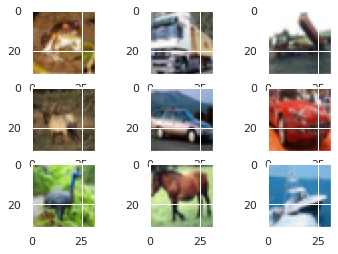

In [ ]:
# Mostrando algumas imagens do banco de dados
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

In [ ]:
#Convertendo de "int" para "float"
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [ ]:
#Normalizando os dados (como a entrada está em pixel, que varia de 0 a 255, então vamos normalizar dividindo por 255)
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
#Categorizando a "variável resposta"
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [ ]:
#Categorizando a "variável resposta"
#one_hot_encoder = OneHotEncoder(sparse=False)

#one_hot_encoder.fit(y_train)

#y_train = one_hot_encoder.transform(y_train)
#y_test = one_hot_encoder.transform(y_test)

## 3.3. Modelagem

#### Modelo CNN

O número exato de camadas de pool varia de acordo com o obejetivo da modelagem. Pelo fato de estarmos tabalhando com imagens muito pequenas, agrupamos somete uma vez.

In [ ]:
#===============================================================================
#Modelo CNN
#===============================================================================


#Etapa 1: convolucional, ativação, dropout, pooling-----------------------------

#Criando o modelo
model = Sequential()

#Camada 1:
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same')) #Número de filtros (32), tamanho do filtro (3x3), forma de entrada e preenchimento (same: não estamos mudando o tamanho da imagem)
model.add(Activation('relu')) #Função de ativação
model.add(Dropout(0.2)) #Eliminação: Camada de dropout para evitar overfitting (vamos tirar 20% das conexões existentes)
model.add(BatchNormalization()) #Normalização: Normalizando as entradas da nova camada

#Camada 2: Nova camada com filtro maior, para a rede aprender representações mais complexas
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #Camada de pool (camada de pool: tornar o classificador de imagens mais robusto para aprender padrões relevantes)
model.add(Dropout(0.2)) #Eliminação: Camada de dropout para evitar overfitting (vamos tirar 20% das conexões existentes)
model.add(BatchNormalization()) #Normalização: Normalizando as entradas da nova camada








#Etapa 2: Camadas---------------------------------------------------------------

#Após terminar com as camadas, vamos nivelar os dados e realizar a eliminação novamente
model.add(Flatten())
model.add(Dropout(0.2))

#Criando a primeira camada densamente conectada
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
    
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#Função que selecionará o neurônio com maior probabilidade como saída, definindo a imagem como resposta:
model.add(Dense(class_num))
model.add(Activation('softmax'))

#Usando o algoritmo de Adam (otimizador que ajustará os pesos em sua rede para se aproximar do ponto de menor perda):
optimizer = 'adam'

#Compilando o modelo (escolhendo os parâmetros e especificando a métrica):
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
#print(model.summary())











#Etapa 3: Treinamento do modelo ------------------------------------------------

epochs = 20 #Projetando o modelo pelo número de épocas: colocar 25 dps
numpy.random.seed(seed) #semente escolhida no começo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64) #temos 50.000 amostras de treino e 10.000 amostras de teste.









#Etapa 4: Avaliação do modelo --------------------------------------------------

# Acurácia
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))




In [ ]:
# Model evaluation
plt.title('Accuracy Score')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

plt.title('Loss Values')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# 4. Considerações finais

Apresentamos neste material alguns breves conceitos sobre imagens e aplicações de técnicas de reconhecimento de padrões para sua classificação. Foi discutido alguns dos principais algoritmos utilizados para a classificação, tais como KNN e MAXVER, e resolvemos apresentar especificamente a implementação do algortimo baseado em redes neuras, mais especificamente na CNN, no conjunto de dados CIFAR-10. 

Com base nessa abordagem, obtemos uma acurácia de mais de 83%, considerando 25 épocas. Vale ressaltar, que esse esse algoritmo pode ser modificado a ponto de termos melhores resultados do que os que foram apresentados neste material.

Com esse material, é possível, futuramente, realizar comparações entre as diversas técnicas de classficação a partir dos resultados obtidos para este caso. O uso de técnicas simples, como o KNN, ou o de técnicas complexas, como o MAXVER, podem trazer resultados piores ou melhores, obviamente, e servirão como base para outros pesquisadores conhecerem os resultados obtidos.



--------------------------------------------------------------------------------
### Material elaborado por **Vinícius Osterne**

###### Formação: Estatístico e Cientista de Dados

###### Contato: vinicius@osterne

###### Acervo: www.osterne.com